# Analysing the Graph of Stack Overflow

**To be completed INDIVIDUALLY and due on May 3 at 3pm.**

In [ ]:
print('Your fitst name + last name')

** (70 pts) **



In this assignment, we will look at posts on Stack Overflow during the year of 2015. We have downloaded the [data dump](http://cs-people.bu.edu/bahargam/506/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. In this assignment, we will analyse the graph of interaction among users. The nodes in this graph will be the users. If $user_{i  }$ has answered a question of $user_{j}$ (or vice versa), there will be an edge between $node_{i}$ and $node_{j}$ in the graph.

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
from pandas import DataFrame as DF
from pandas import Series
import time
from collections import defaultdict as dfdict
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [2]:
s = time.time() # counting running time


question=dfdict(dict) # count question posts' new element without loop
answer=dfdict(list) # count answer posts

for _, elem in ET.iterparse( 'stackoverflow-posts-2015.xml', events=("start", "end")):
    try: 
        if elem.attrib['PostTypeId']=='1': # questions
            tmp = []
            tmp.append(elem.attrib['OwnerUserId'])
            question[elem.attrib['Id']]=tmp
            
        if elem.attrib['PostTypeId']=='2': # answers
            answer[elem.attrib['OwnerUserId']].append(elem.attrib['ParentId'])
            
    except: None # avoid empty line and missing elememts
    elem.clear() # free up memory

question=dict(question) # convert defaultdict to dict
answer=dict(answer)

print(time.time()-s)

249.0960249900818


In [27]:
print (len(answer))
print (len(question))

509815
2518853


In [3]:
answer2={}
for key in answer:
    for value in answer[key]:
        if value in question:
            if key in answer2:
                answer2[key] +=question[value]
            else:
                answer2[key] = question[value]

                

## Step 1
Analyze the resulting graph in terms of the number of connected components and degree distribution.

In [55]:
G=nx.Graph(answer2)

In [62]:
con_num = nx.number_connected_components(G)
degree = nx.degree(G)
vs = set(degree.values())
x= []
y=[]
for m in vs:
    x.append(m)
    y.append(list(degree.values()).count(m))

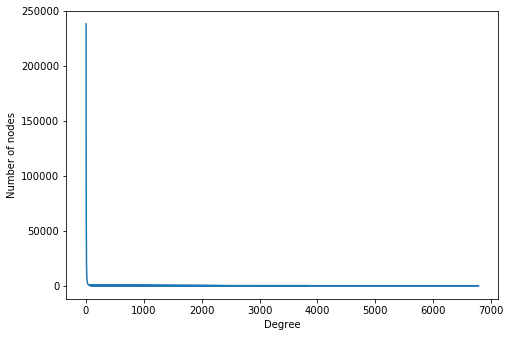

the number of connected components: 36530


In [63]:
plt.plot(x,y)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()
print ('the number of connected components:',con_num)

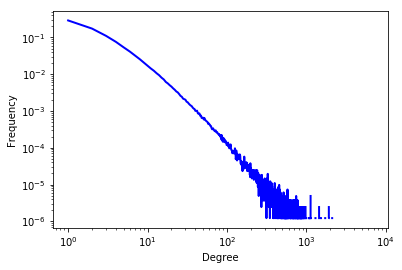

In [7]:
degree =  nx.degree_histogram(G)  
x = range(len(degree))                        
y = [z / float(sum(degree)) for z in degree]  
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.loglog(x,y,color="blue",linewidth=2)     
plt.show()     

## Step 2
Working with the largest connected component and using three of the methods we described in the class, find the centrality scores of the nodes in this component.  Then use the $L_{1}$ distance to perform a comparison of the three methods. Finally, visualize your results.

In [56]:
sb = G.size()

sl = G.nodes_with_selfloops()
for l in sl:
    G.remove_edge(l,l)
    
sf = G.size()
print ('the number of Edges with self-loop:',sb)
print ('the number of Edges without self-loop:',sf)
print ('the number of nodes',len(G))

the number of Edges with self-loop: 3430718
the number of Edges without self-loop: 3269526
the number of nodes 817800


In [53]:
kn = nx.core_number(G)

In [57]:
co = {} #k-core decomposition
dl = []

for key, value in kn.items():
    co.setdefault(value, set()).add(key)
    
for key in co:
    if key<24:
        dl.append(key)

for dn in dl:
    nod = list(co[dn])
    G.remove_nodes_from(nod)

In [58]:
len(G)

5515

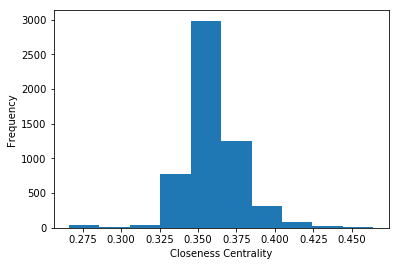

In [59]:
cc = nx.closeness_centrality(G)
x =list(cc.values())
plt.hist(x)
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")
plt.show()

D:\PYTHON3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\PYTHON3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\PYTHON3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\PYTHON3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


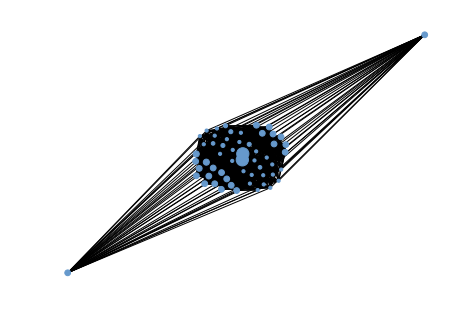

In [49]:
pos = nx.spring_layout(G)
cent = np.array(list(cc.values()))
scaler = MinMaxScaler((10,150))
scaledC = scaler.fit_transform(cent[:,np.newaxis])
nx.draw(G, node_size=scaledC, pos=pos, node_color='#6699cc')
plt.show()

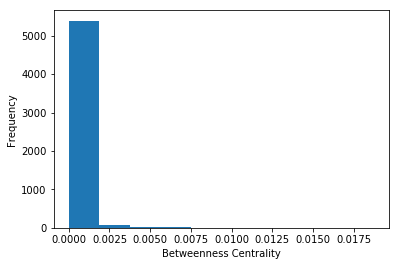

In [60]:
bc = nx.betweenness_centrality(G)
x1 =list(bc.values())
plt.hist(x1)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.show()

D:\PYTHON3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\PYTHON3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\PYTHON3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\PYTHON3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


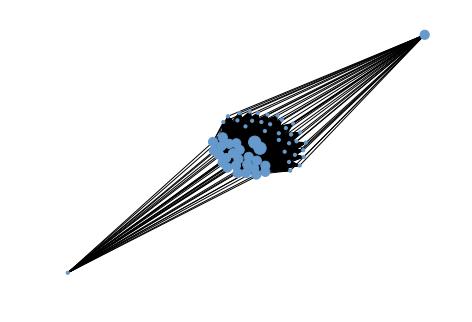

In [45]:
cent1 = np.array(list(bc.values()))
scaler1 = MinMaxScaler((10,150))
scaledC1 = scaler1.fit_transform(cent1[:,np.newaxis])
nx.draw(G, node_size=scaledC1, pos=pos, node_color='#6699cc')
plt.show()

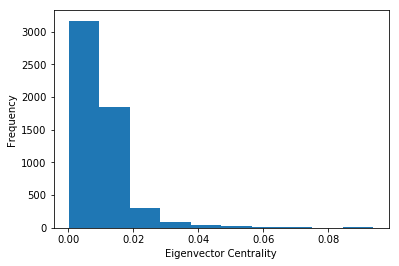

In [61]:
sc = nx.eigenvector_centrality(G)
x2 =list(sc.values())
plt.hist(x2)
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequency")
plt.show()

D:\PYTHON3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\PYTHON3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\PYTHON3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\PYTHON3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


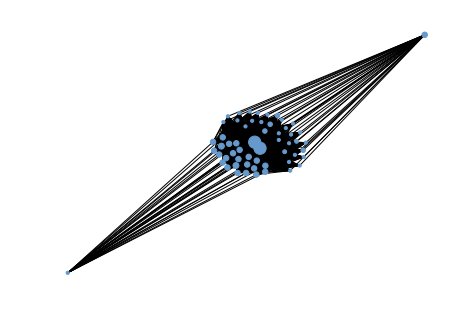

In [44]:
cent2 = np.array(list(sc.values()))
scaler2 = MinMaxScaler((10,150))
scaledC2 = scaler2.fit_transform(cent2[:,np.newaxis])
nx.draw(G, node_size=scaledC2, pos=pos, node_color='#6699cc')
plt.show()

## Step 3
Again working with the largest connected component, use two different methods for identifying communities (partitions of the graph). Visualize your results and compare the output of the two methods using standard clustering comparison methods we discussed in the class.